# Random Forest Classification algorithm

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.


Problem Statement:

Using the RandomForest algorithm,  classify each digit basing on the 8x8 pixel information



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
plt.gray()

<Figure size 432x288 with 0 Axes>

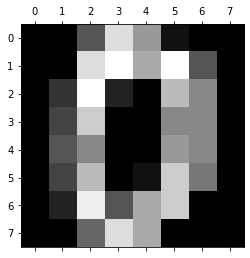

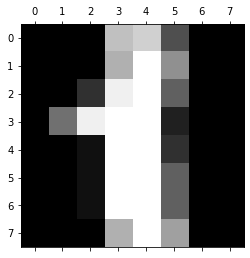

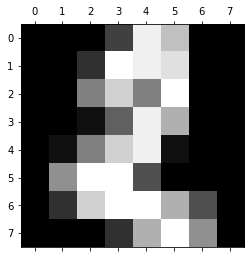

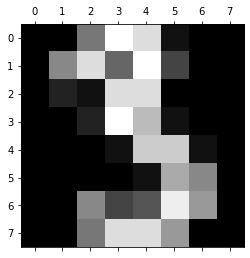

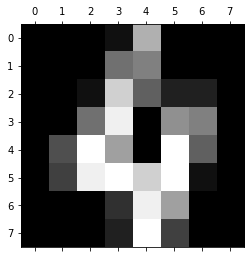

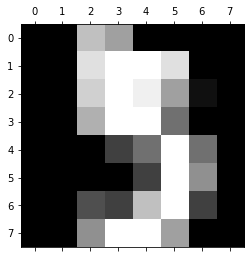

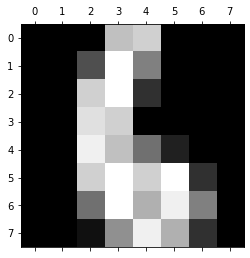

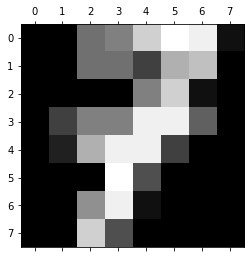

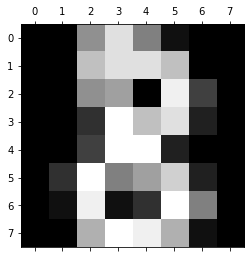

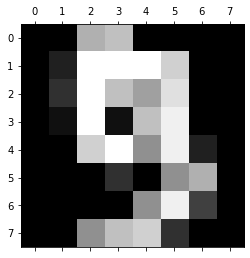

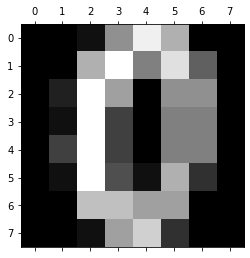

In [10]:
#8 X 8 pixel array each digit is
for i in range(11):
    plt.matshow(digits.images[i])

In [7]:
len(digits.data[-1])

64

In [11]:
# each sample is an array of 64 numbers
df=pd.DataFrame(digits.data)
df.head(11)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [9]:
len(df)

1797

In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
len(digits.target)


1797

In [14]:
df['target']=digits.target
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [15]:
df.target.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
#X=df.drop(['target'],axis='columns')
#y=df.target
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.20,random_state=10)

In [17]:
len(X_train)

1437

In [18]:
len(X_test)

360

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,criterion='gini')
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
model.score(X_test,y_test) # Gini as criterion

0.9694444444444444

In [20]:
model.score(X_test,y_test) # Entropy as criterion

0.9666666666666667

In [21]:
model.score(X_train,y_train)

1.0

In [24]:
y_predicted= model.predict(X_test)
y_predicted

array([5, 2, 5, 4, 1, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 2,
       6, 7, 8, 8, 5, 8, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 3, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 7, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 7, 6, 1, 1, 1, 4, 0,
       7, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 3, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 3, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0, 36]], dtype=int64)

Text(69.0, 0.5, 'Actual')

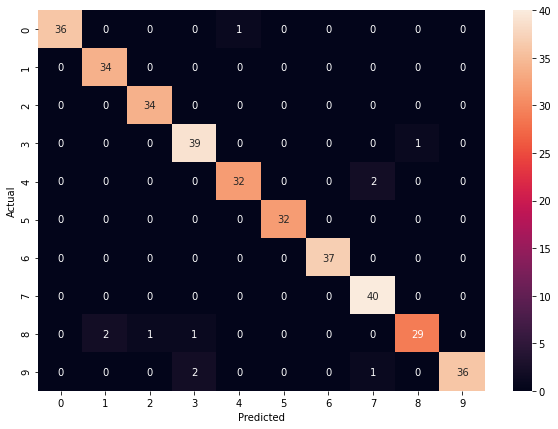

In [26]:

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')



ASSIGNMENT:

Use iris flower dataset from sklearn.datasets to predict flower species using random forest classifier<br>
1. measure prediction score using default n estimators(10) <br>
2. now fine tune your model by changing number of trees in your classifier and tell me what best score you can get using how many trees

